In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 14.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.2 MB/s eta 0:00:00
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 54.5 MB/s eta 0:00:00a 0:00:01
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Created wheel for peewee: filename=peewee-3.17.8-cp39-cp39-macos

In [3]:
import yfinance as yf

import pandas as pd

import numpy as np

from statsmodels.tsa.arima.model import ARIMA

from sklearn.ensemble import RandomForestClassifier

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [5]:
stock = 'AAPL'

df = yf.download(stock, start='2018-01-01', end='2024-11-27')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-01-02,40.524349,43.064999,43.075001,42.314999,42.540001,102223600
2018-01-03,40.517284,43.057499,43.637501,42.990002,43.132500,118071600
2018-01-04,40.705482,43.257500,43.367500,43.020000,43.134998,89738400
2018-01-05,41.168930,43.750000,43.842499,43.262501,43.360001,94640000
2018-01-08,41.016026,43.587502,43.902500,43.482498,43.587502,82271200
...,...,...,...,...,...,...
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300


In [7]:
df = df[['Adj Close']]

In [8]:
df.index.dtype

dtype('<M8[ns]')

In [9]:
df.index = pd.to_datetime(df.index)

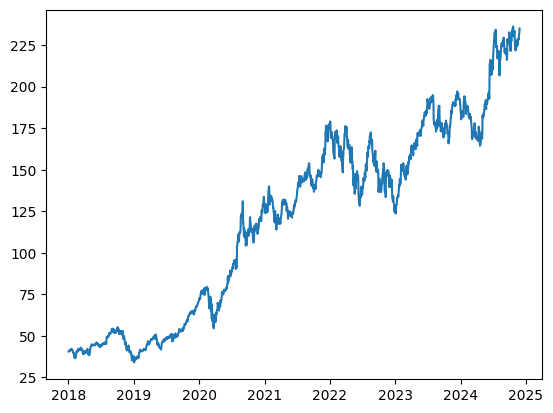

In [10]:
plt.plot(df)

In [11]:
result = adfuller(df['Adj Close'])

In [12]:
result[0]

-0.22225717189661265

In [13]:
result[1]

0.9358160968282948

(array([437., 124.,  85.,  62., 201., 268., 247., 191.,  22., 101.]),
 array([ 33.95254898,  54.17930489,  74.40606079,  94.6328167 ,
        114.8595726 , 135.08632851, 155.31308441, 175.53984032,
        195.76659622, 215.99335213, 236.22010803]),
 <BarContainer object of 10 artists>)

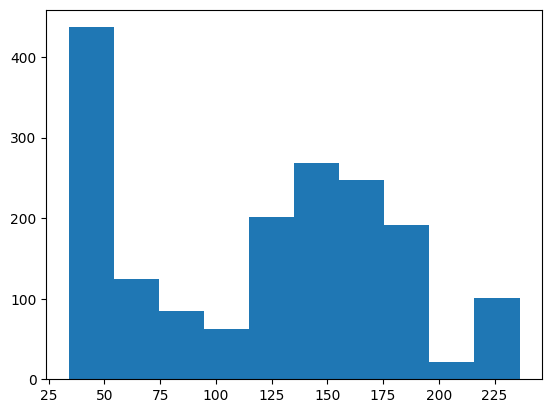

In [14]:
plt.hist(df['Adj Close'])
#if the distribution is normally distributed then its stationarity

In [15]:
print(np.var(df['Adj Close']))

print(np.std(df['Adj Close']))

print(np.mean(df['Adj Close']))

Ticker
AAPL    3358.67026
dtype: float64
Ticker
AAPL    57.954036
dtype: float64
120.73701586575173


/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [16]:
df['price_diff'] = df['Adj Close'].shift()

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_10072/3345605203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_diff'] = df['Adj Close'].shift()


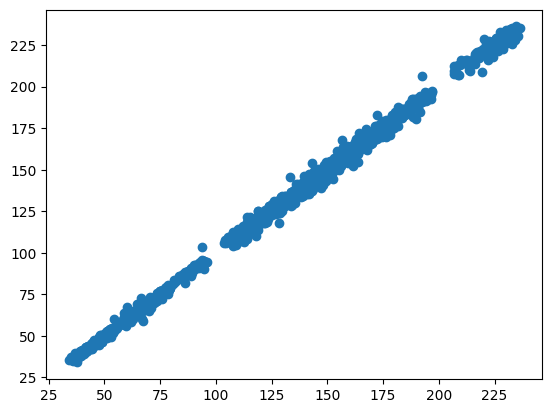

In [17]:
plt.scatter(df['price_diff'],df['Adj Close'])

In [18]:
df['t-2'] = df['Adj Close'].shift(2)

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_10072/531317907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-2'] = df['Adj Close'].shift(2)


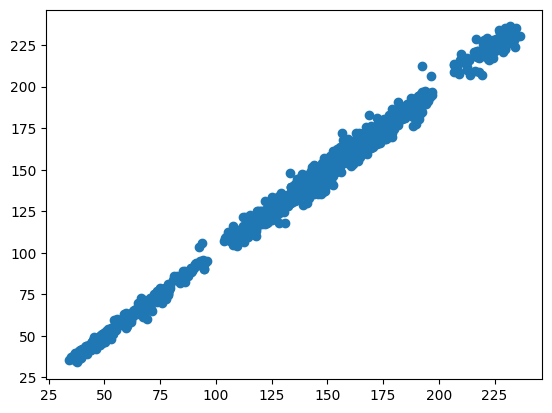

In [19]:
plt.scatter(df['t-2'], df['Adj Close'])

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_10072/1838862594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-50'] = df['Adj Close'].shift(50)


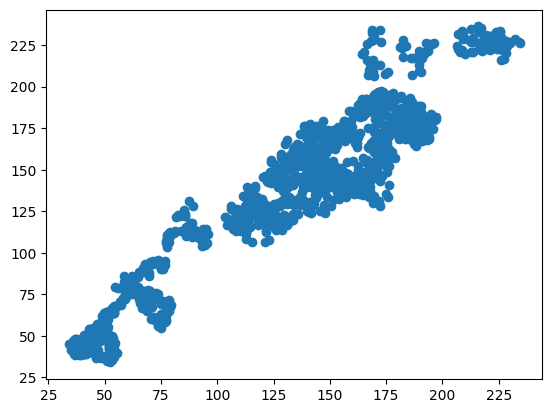

In [20]:
df['t-50'] = df['Adj Close'].shift(50)

plt.scatter(df['t-50'], df['Adj Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

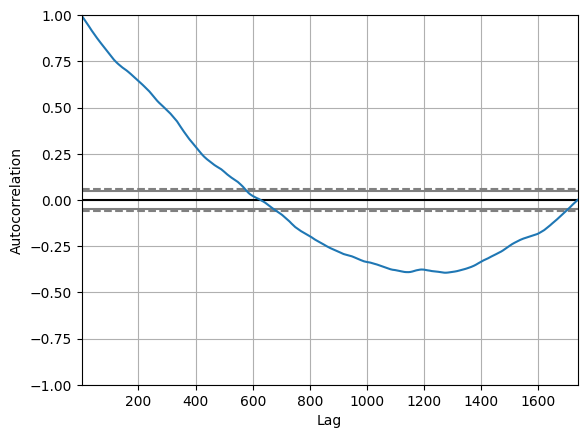

In [21]:
pd.plotting.autocorrelation_plot(df['Adj Close'])

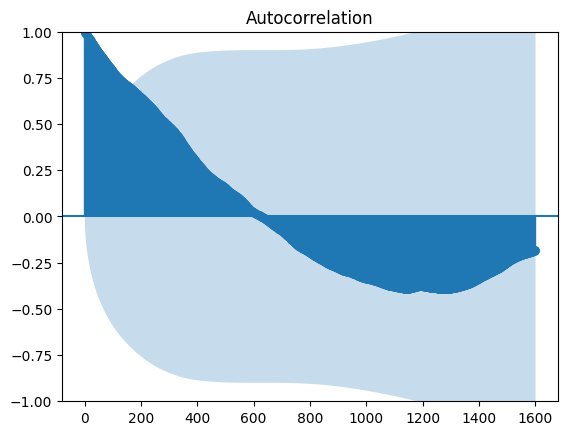

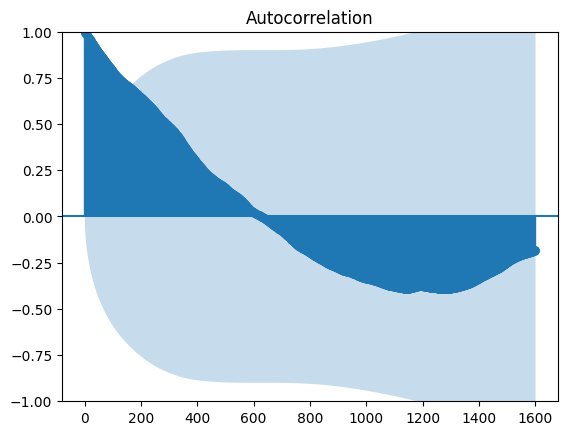

In [22]:
plot_acf(df['Adj Close'], lags=1600)


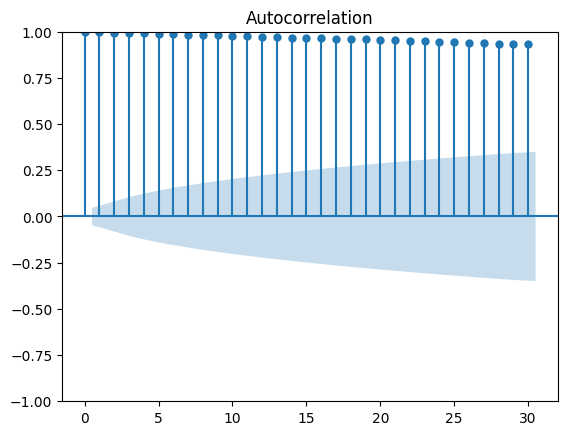

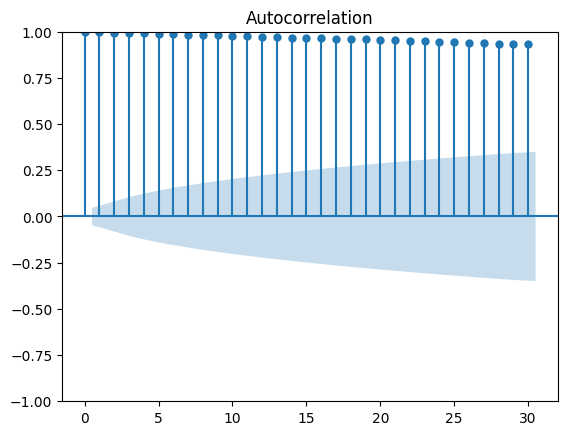

In [23]:
plot_acf(df['Adj Close'], lags=30)

In [24]:
#fit arima model first

model = ARIMA(df['Adj Close'], order=(50,1,1))

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
fit = model.fit()

In [26]:
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1738
Model:                ARIMA(50, 1, 1)   Log Likelihood               -3875.303
Date:                Tue, 10 Dec 2024   AIC                           7854.607
Time:                        16:55:15   BIC                           8138.523
Sample:                             0   HQIC                          7959.600
                               - 1738                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7508      0.299     -2.511      0.012      -1.337      -0.165
ar.L2         -0.0319      0.026     -1.215      0.224      -0.083       0.020
ar.L3         -0.0386      0.028     -1.377      0.1

In [27]:
forecast = fit.forecast(steps=30)

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

forecast_series = pd.Series(forecast, index=forecast_index)

In [29]:
forecast_df = pd.concat([pd.DataFrame(forecast_index), pd.DataFrame(forecast.reset_index())], axis=1)

forecast_df.drop('index', axis=1, inplace=True)

forecast_df.rename({0:'date'},axis=1, inplace=True)

In [30]:
forecast_df.set_index('date', inplace=True)

forecast_df

,predicted_mean
date,
2024-11-27,235.713652
2024-11-28,234.651440
2024-11-29,234.556064
2024-12-02,234.335611
2024-12-03,234.677694
2024-12-04,234.367431
2024-12-05,234.721980
2024-12-06,234.831383
2024-12-09,234.590541


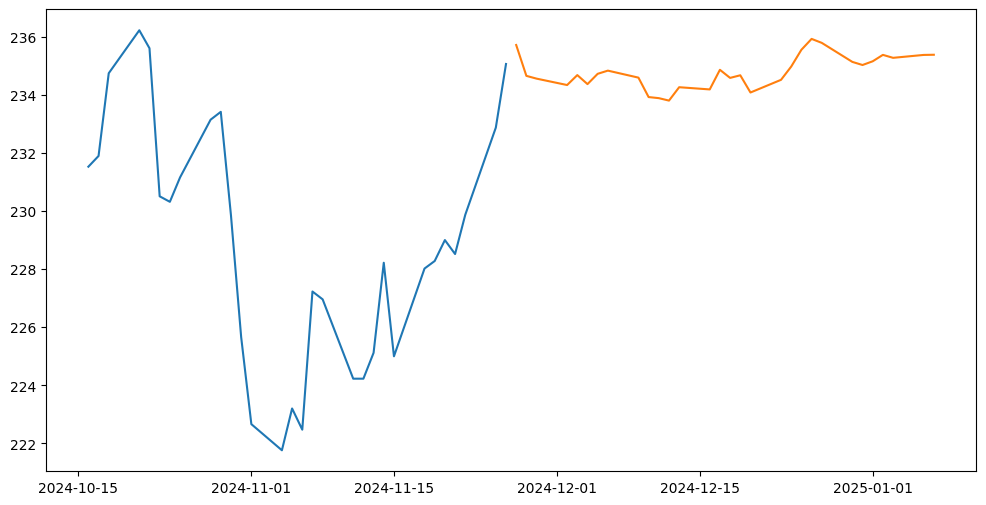

In [31]:
plt.figure(figsize=(12,6))

plt.plot(df['Adj Close'].iloc[-30:])

plt.plot(forecast_df)

In [32]:
df.rename({'price_diff':'t-1'}, axis=1,inplace=True)

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_10072/1087581616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({'price_diff':'t-1'}, axis=1,inplace=True)


In [33]:
df.drop('t-50', axis=1, inplace=True)

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_10072/1500505010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('t-50', axis=1, inplace=True)


In [34]:
df['t-3'] = df['Adj Close'].shift(3)

/var/folders/hj/50ynckj97xq7d49_2_s66f100000gn/T/ipykernel_10072/253340229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t-3'] = df['Adj Close'].shift(3)


In [35]:
df

Price,Adj Close,t-1,t-2,t-3
Ticker,AAPL,,,
Date,,,,
2018-01-02,40.524349,NaN,NaN,NaN
2018-01-03,40.517284,40.524349,NaN,NaN
2018-01-04,40.705482,40.517284,40.524349,NaN
2018-01-05,41.168930,40.705482,40.517284,40.524349
2018-01-08,41.016026,41.168930,40.705482,40.517284
...,...,...,...,...
2024-11-20,229.000000,228.279999,228.020004,225.000000
2024-11-21,228.520004,229.000000,228.279999,228.020004


In [36]:
#train test split with RF model

train_size = int(0.8 * len(df))

In [37]:
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [38]:
X_train = train[['t-1', 't-2', 't-3']]

y_train = train['Adj Close']

X_test = test[['t-1', 't-2', 't-3']]

y_test = test['Adj Close']

In [39]:
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [40]:
y_pred = rf.predict(X_test)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

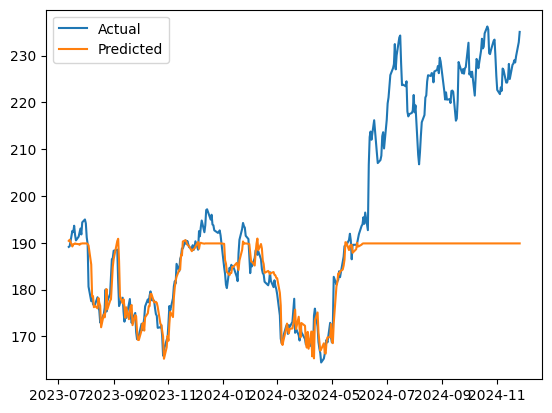

In [42]:
plt.plot(test.index, y_test, label='Actual')

plt.plot(test.index, y_pred, label='Predicted')

plt.legend()

In [43]:
arima_forecast = fit.forecast(steps = len(y_test))

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))

In [45]:
arima_rmse

44.62321146616043

In [46]:
rmse

20.215954176467353